# Preprocesamiento de Datos para el Dataset de Airbnb en Málaga

Este notebook realiza el preprocesamiento del dataset de Airbnb en Málaga. Los pasos incluyen:
1. Cargar el dataset.
2. Corrección de tipos de datos y valores inconsistentes.
3. Detección y manejo de duplicados.
4. Limpieza y manejo de valores nulos.
5. Manejo de outliers.
6. Creación de nuevas características.

El dataset limpio se guardará para su posterior análisis en el notebook de EDA.

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cargar el Dataset

Cargar el dataset de Airbnb en Málaga y mostrar información básica.

In [2]:
# Cargar el dataset
df = pd.read_csv(r'/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/malaga_extended.csv')

# Mostrar las primeras filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,96033,https://www.airbnb.com/rooms/96033,20250328164700,2025-03-29,city scrape,"Bonito piso a 200m de la playa, El Palo (Málaga)",Do you have a backpacker spirit and are lookin...,"200 metres from the beaches of El Palo, Malaga...",https://a0.muscache.com/pictures/hosting/Hosti...,510467,https://www.airbnb.com/users/show/510467,Rafael,2011-04-15,"Andalusia, Spain",¡Hola! Gracias por acercarte a nosotros y enca...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/59fb2...,https://a0.muscache.com/im/pictures/user/59fb2...,NaN,1,1,"['email', 'phone']",t,t,"Málaga, Andalusia, Spain",Este,NaN,36.720310,-4.356270,Entire rental unit,Entire home/apt,3,1.0,1 bath,2.0,2.0,"[""High chair"", ""Coffee"", ""Conditioner"", ""Dishe...",$54.00,3,180,3,3,1125,1125,3.0,1125.0,NaN,t,14,37,48,259,2025-03-29,250,39,1,172,37,234,12636.0,2013-10-18,2025-03-01,4.60,4.71,4.61,4.88,4.93,4.43,4.59,VUT/MA/22043,f,1,1,0,0,1.79
1,166473,https://www.airbnb.com/rooms/166473,20250328164700,2025-03-29,city scrape,Perfect Location In Malaga,This apartment is rented out by the room - new...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,793360,https://www.airbnb.com/users/show/793360,Fred,2011-07-08,"El Faro, Spain","Hi All, my name is Fred and I am half Swedish ...",within a few hours,100%,72%,f,https://a0.muscache.com/im/pictures/user/f2d8a...,https://a0.muscache.com/im/pictures/user/f2d8a...,NaN,5,5,"['email', 'phone']",t,t,NaN,Este,NaN,36.720310,-4.361080,Private room in rental unit,Private room,1,2.0,2 shared baths,1.0,4.0,"[""Dryer"", ""Dishes and silverware"", ""Private en...",$22.00,5,365,5,5,365,1000,5.0,480.7,NaN,t,0,0,26,301,2025-03-29,101,4,0,214,6,40,880.0,2011-08-25,2025-02-11,4.72,4.60,4.50,4.83,4.91,4.80,4.72,NaN,f,5,1,4,0,0.61
2,330760,https://www.airbnb.com/rooms/330760,20250328164700,2025-03-29,city scrape,Malaga Lodge Guesthouse Double room-shared bath.,The Lodge is set in a charming town house in L...,Málaga Lodge is situated next to the famous Sa...,https://a0.muscache.com/pictures/85419390/38a9...,1687526,https://www.airbnb.com/users/show/1687526,Mayte,2012-02-02,Spain,"Dear guest,\nMy name is Mayte Moreno Higgins. ...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/1687526/profi...,https://a0.muscache.com/im/users/1687526/profi...,NaN,7,9,"['email', 'phone']",t,t,"Málaga, Andalusia, Spain",Centro,NaN,36.729786,-4.413462,Private room in townhouse,Private room,2,1.5,1.5 shared baths,1.0,1.0,"[""Coffee"", ""Paid dryer \u2013 In building"", ""L...",$51.00,1,1125,1,1,365,365,1.0,365.0,NaN,t,12,20,43,218,2025-03-29,60,5,

## Descripción del Dataset

Mostrar información básica del dataset, incluyendo nombres de columnas, tipos de datos y valores nulos.

In [3]:
# Imprimir nombre de las columnas del dataset
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
# Mostrar información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9621 entries, 0 to 9620
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9621 non-null   int64  
 1   listing_url                                   9621 non-null   object 
 2   scrape_id                                     9621 non-null   int64  
 3   last_scraped                                  9621 non-null   object 
 4   source                                        9621 non-null   object 
 5   name                                          9621 non-null   object 
 6   description                                   9395 non-null   object 
 7   neighborhood_overview                         4309 non-null   object 
 8   picture_url                                   9621 non-null   object 
 9   host_id                                       9621 non-null   i

In [5]:
# Mostrar estadísticas descriptivas
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9621.00,9621.00,9621.00,9621.00,9621.00,0.00,9621.00,9621.00,9621.00,8709.00,9432.00,8713.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,0.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,9621.00,8711.00,8454.00,8454.00,8454.00,8454.00,8454.00,8454.00,8454.00,9621.00,9621.00,9621.00,9621.00,8454.00
mean,635269545445930624.00,20250328164700.00,217369091.31,44.49,57.69,NaN,36.72,-4.42,3.93,1.30,1.65,2.52,3.41,516.34,3.31,7.36,609.84,715.49,4.69,658.83,NaN,8.78,21.02,35.77,162.15,46.33,12.74,0.87,128.86,12.49,73.36,9183.27,4.64,4.70,4.68,4.75,4.78,4.70,4.58,24.36,22.74,1.61,0.01,1.40
std,526289589621325824.00,0.00,194649715.98,103.06,170.31,NaN,0.01,0.02,2.15,0.69,1.19,2.00,12.88,422.34,11.74,20.29,461.08,432.97,12.53,429.35,NaN,8.82,18.71,29.29,123.70,79.12,17.85,1.54,95.12,18.18,85.42,29081.81,0.43,0.40,0.41,0.38,0.37,0.37,0.44,41.50,41.38,5.35,0.27,1.48
min,96033.00,20250328164700.00,45553.00,1.00,1.00,NaN,36.65,-4.58,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.01
25%,42222753.00,20250328164700.00,48429489.00,2.00,2.00,NaN,36.72,-4.43,2.00,1.00,1.00,1.00,1.00,180.00,1.00,2.00,90.00,365.00,2.00,365.00,NaN,0.00,1.00,2.00,36.00,3.00,1.00,0.00,26.00,0.00,6.00,630.00,4.53,4.63,4.56,4.69,4.72,4.59,4.48,2.00,1.00,0.00,0.00,0.35
50%,773102203959943936.00,20250328164700.00,142022277.00,8.00,9.00,NaN,36.72,-4.42,4.00,1.00,1.00,2.00,2.00,365.00,2.00,4.00,365.00,999.00,2.90,637.30,NaN,7.00,18.00,34.00,164.00,15.00,5.00,0.00,140.00,5.00,36.00,3696.00,4.75,4.81,4.79,4.86,4.88,4.80,4.67,5.00,4.00,0.00,0.00,0.91
75%,1131137775001653888.00,20250328164700.00,382146507.00,48.00,58.00,NaN,36.73,-4.42,5.00,1.50,2.00,3.00,3.00,1125.00,2.00,5.00,1125.00,1125.00,4.00,1125.00,NaN,14.00,35.00,60.00,272.00,53.00,18.00,1.00,214.00,17.00,120.00,11400.00,4.90,4.93,4.94,4.96,4.99,4.94,4.83,28.00,25.00,0.00,0.00,2.00
max,1386257800461789952.00,20250328164700.00,686086255.00,2109.00,8668.00,NaN,36.88,-4.28,16.00,16.00,25.00,50.00,500.00,1125.00,500.00,500.00,1125.00,1125.00,500.00,1125.00,NaN,30.00,60.00,90.00,365.00,1027.00,174.00,23.00,279.00,179.00,255.00,1426308.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,218.00,218.00,42.00,8.00,24.94


In [6]:
# Mostrar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                      226
neighborhood_overview                           5312
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                   2133
host_about                                      4094
host_response_time                               899
host_response_rate                               899
host_acceptance_rate                             456
host_is_superhost  

In [7]:
# Mostrar porcentaje los valores nulos del dataset
df.isnull().mean() * 100

id                                               0.00
listing_url                                      0.00
scrape_id                                        0.00
last_scraped                                     0.00
source                                           0.00
name                                             0.00
description                                      2.35
neighborhood_overview                           55.21
picture_url                                      0.00
host_id                                          0.00
host_url                                         0.00
host_name                                        0.00
host_since                                       0.00
host_location                                   22.17
host_about                                      42.55
host_response_time                               9.34
host_response_rate                               9.34
host_acceptance_rate                             4.74
host_is_superhost           

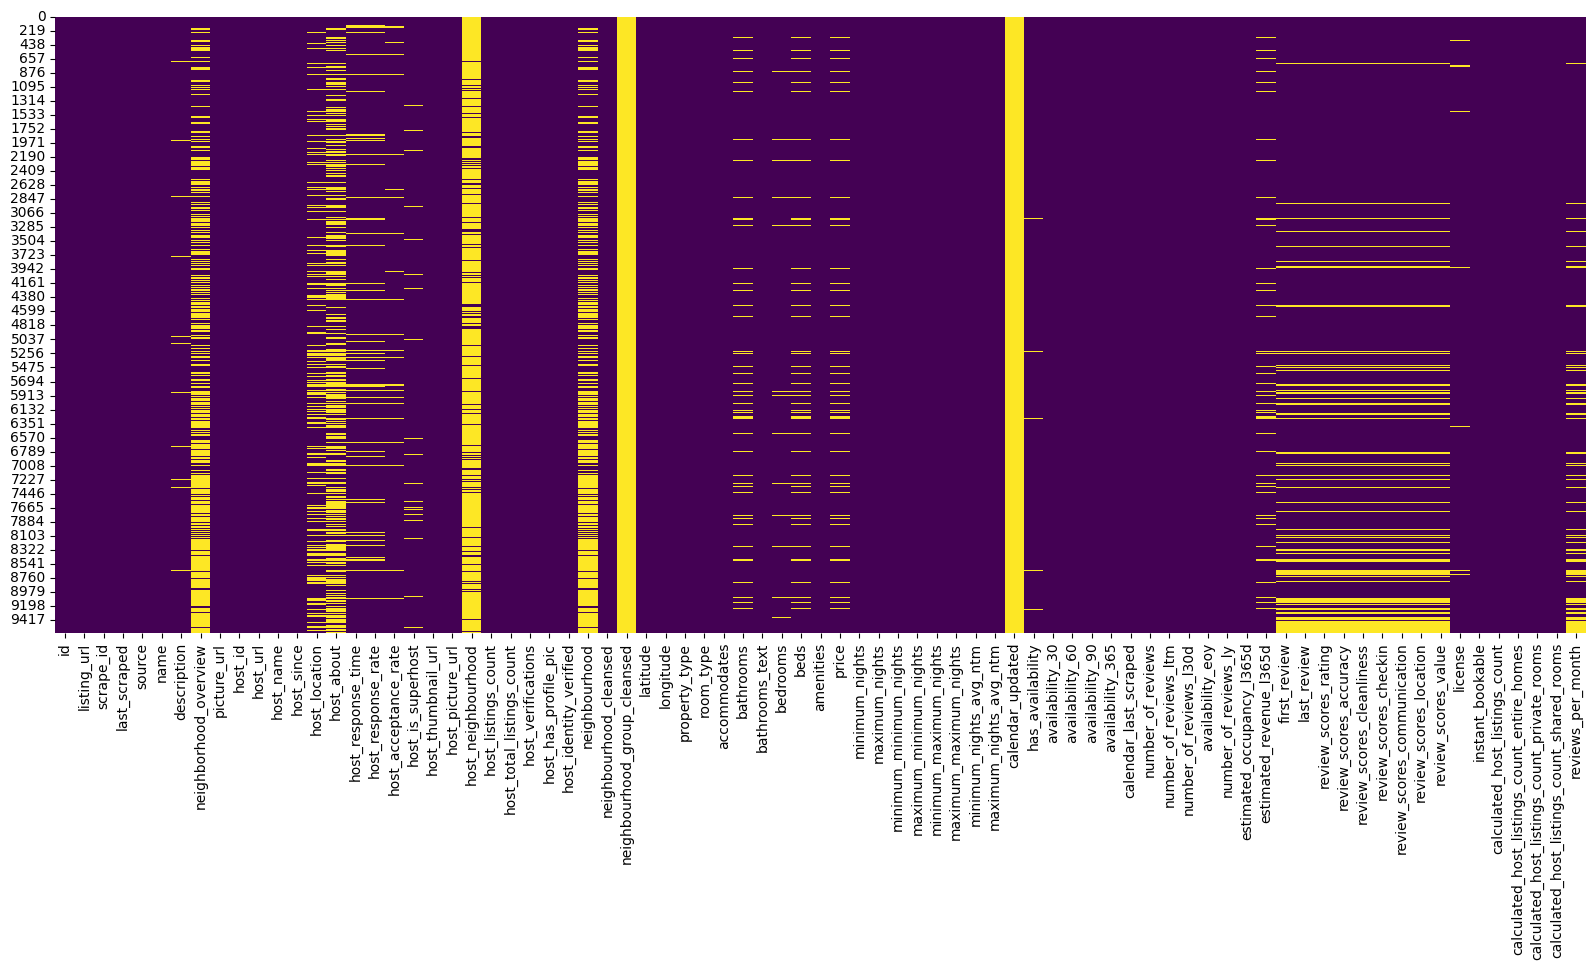

In [8]:
# Visualización de los datos nulos
plt.figure(figsize=(len(df.columns) * 0.25, 8))  # Ajusta el ancho según el número de columnas
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.xticks(rotation=90)
plt.show()

## Corrección de Tipos de Datos

Convertir columnas a los tipos de datos correctos y limpiar valores inconsistentes.

In [9]:
# Corrección de tipos de datos
def correct_data_types(df):
    # Convertir columnas de fecha
    date_cols = ['host_since', 'first_review', 'last_review', 'last_scraped', 'calendar_last_scraped']
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    # Convertir columnas de porcentaje
    percent_cols = ['host_response_rate', 'host_acceptance_rate']
    for col in percent_cols:
        if col in df.columns:
            df[col] = (
                df[col]
                .astype(str)
                .str.strip()
                .replace({'nan': np.nan, 'NaN': np.nan})
                .str.rstrip('%')
                .astype(float) / 100
            )

    # Convertir columnas booleanas
    bool_map = {'t': True, 'f': False}
    bool_cols = ['host_is_superhost', 'has_availability', 'instant_bookable', 'host_identity_verified']
    for col in bool_cols:
        if col in df.columns:
            df[col] = df[col].map(bool_map)

    # Limpiar y convertir columnas numéricas
    num_cols = ['price', 'estimated_revenue_l365d', 'review_scores_rating',
                'review_scores_location', 'reviews_per_month']
    for col in num_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(
                df[col].replace(r'[\$,€]', '', regex=True), errors='coerce'
            )

    # Convertir columnas enteras a tipo int
    integer_cols = ['bedrooms', 'accommodates', 'beds', 'minimum_nights',
                    'maximum_nights', 'number_of_reviews', 'calculated_host_listings_count']
    for col in integer_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

    return df

# Aplicar la función
df = correct_data_types(df)

# Verificar tipos de datos
print("Tipos de datos después de la corrección:")
print(df.dtypes)

Tipos de datos después de la corrección:
id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
source                                                  object
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_

## Detección y Manejo de Duplicados

Identificar filas duplicadas en el dataset.

In [10]:
# Verificar duplicados
print(f"Duplicados en el dataset: {df.duplicated().sum()}")

Duplicados en el dataset: 0


In [11]:
# Eliminar columna 'neighbourhood'
# ya que 'neighbourhood_cleansed' es más precisa
if 'neighbourhood' in df.columns:
    df.drop(columns=['neighbourhood'], inplace=True)

# Renombrar columnas para consistencia
df = df.rename(columns={
    'neighbourhood_group_cleansed': 'neighbourhood_group',
    'neighbourhood_cleansed': 'neighbourhood'
})

## Manejo de Valores Nulos

Rellenar valores nulos de manera sistemática según el tipo de dato y su relevancia.

In [12]:
# Función para rellenar columnas de texto
def fill_text_columns(df, columns, fill_value='no_data'):
    for col in columns:
        if col in df.columns:
            df[col] = df[col].fillna(fill_value)

# Función para rellenar columnas numéricas
def fill_numeric_columns(df, columns, groupby_cols=None, global_mean=True):
    for col in columns:
        if col in df.columns:
            if groupby_cols:
                df[col] = df.groupby(groupby_cols)[col].transform(lambda x: x.fillna(x.mean()))
            if global_mean:
                df[col] = df[col].fillna(df[col].mean())

# Función para rellenar columnas booleanas
def fill_boolean_columns(df, columns, default_value=False):
    for col in columns:
        if col in df.columns:
            df[col] = df[col].fillna(default_value)

# Función para rellenar columnas con cálculos
def fill_with_calculation(df, target_col, calc_func):
    if target_col in df.columns:
        df[target_col] = df[target_col].fillna(calc_func(df))

# Rellenar columnas de texto con 'no_data'
text_cols = ['description', 'neighborhood_overview', 'host_location', 'host_about', 
             'host_neighbourhood', 'calendar_updated', 'host_response_time']
fill_text_columns(df, text_cols, fill_value='no_data')

# Rellenar columnas de puntuaciones con 0
review_score_cols = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 
    'review_scores_location', 'review_scores_value', 'reviews_per_month'
]
fill_numeric_columns(df, review_score_cols, global_mean=False)

# Rellenar 'price' con la media por grupo y luego con la media global
fill_numeric_columns(df, ['price'], groupby_cols=['neighbourhood', 'room_type'])

# Rellenar 'bedrooms', 'beds' y 'bathrooms' con la media por grupo y luego con la media global
fill_numeric_columns(df, ['bedrooms', 'beds', 'bathrooms'], groupby_cols=['room_type', 'neighbourhood'])

# Rellenar columnas de porcentaje con la media por 'host_id' y luego con la media global
percent_cols = ['host_response_rate', 'host_acceptance_rate']
fill_numeric_columns(df, percent_cols, groupby_cols=['host_id'])

# Rellenar 'host_is_superhost' con el valor más frecuente por 'host_id' y luego con False
pd.set_option('future.no_silent_downcasting', True)
if 'host_is_superhost' in df.columns:
    df['host_is_superhost'] = df.groupby('host_id')['host_is_superhost'].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else False)
    ).astype(bool)
    fill_boolean_columns(df, ['host_is_superhost'], default_value=False)

# Rellenar 'has_availability' basado en 'availability_365' y luego con True
pd.set_option('future.no_silent_downcasting', True)
if 'has_availability' in df.columns:
    df['has_availability'] = df['has_availability'].fillna((df['availability_365'] > 0).astype(bool))
    fill_boolean_columns(df, ['has_availability'], default_value=True)

# Rellenar 'estimated_revenue_l365d' calculando con 'price' y 'estimated_occupancy_l365d'
fill_with_calculation(df, 'estimated_revenue_l365d', 
                      lambda df: df['price'] * df['estimated_occupancy_l365d'])

# Rellenar columnas de fechas de reseñas con pd.NaT
if 'first_review' in df.columns and 'last_review' in df.columns:
    df.loc[df['number_of_reviews'] == 0, ['first_review', 'last_review']] = pd.NaT

# Rellenar columnas de puntuaciones y reviews_per_month con 0
review_cols = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 
    'review_scores_location', 'review_scores_value', 'reviews_per_month'
]
for col in review_cols:
    if col in df.columns:
        df.loc[df['number_of_reviews'] == 0, col] = 0

# Rellenar 'license' con 'Unknown'
fill_text_columns(df, ['license'], fill_value='Unknown')

# Rellenar 'bathrooms_text' con 'no_data'
fill_text_columns(df, ['bathrooms_text'], fill_value='no_data')

# Rellenar 'neighbourhood_group' con 'neighbourhood' si es necesario
if 'neighbourhood_group' in df.columns and 'neighbourhood' in df.columns:
    df['neighbourhood_group'] = df['neighbourhood_group'].fillna(df['neighbourhood'])

# Verificar valores nulos restantes
print("Valores nulos restantes después del manejo de nulos:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Valores nulos restantes después del manejo de nulos:
first_review    1167
last_review     1167
dtype: int64


## Manejo de Outliers

Identificar y manejar outliers en columnas clave como `price` y `estimated_revenue_l365d`.

In [16]:
# Función para detectar outliers usando el rango intercuartílico (IQR)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Función para detectar outliers usando Modified Z-Score
def detect_outliers_modified_zscore(df, column, threshold=3.5):
    median = df[column].median()
    mad = np.median(np.abs(df[column] - median))  # Desviación absoluta mediana
    if mad == 0:  # Evitar división por cero
        return pd.DataFrame()  # No hay outliers si MAD es 0
    modified_z_scores = 0.6745 * (df[column] - median) / mad
    outliers = df[np.abs(modified_z_scores) > threshold]
    return outliers

# Función para combinar IQR y Modified Z-Score
def detect_outliers_combined(df, column, zscore_threshold=3.5):
    # Detectar outliers con IQR
    iqr_outliers = detect_outliers_iqr(df, column)
    
    # Detectar outliers con Modified Z-Score
    zscore_outliers = detect_outliers_modified_zscore(df, column, threshold=zscore_threshold)
    
    # Combinar resultados
    combined_outliers = pd.concat([iqr_outliers, zscore_outliers]).drop_duplicates()
    return combined_outliers

Outliers en 'price': 735
     price
73  781.70
98  286.00
112 311.75
116 475.00
177 316.00


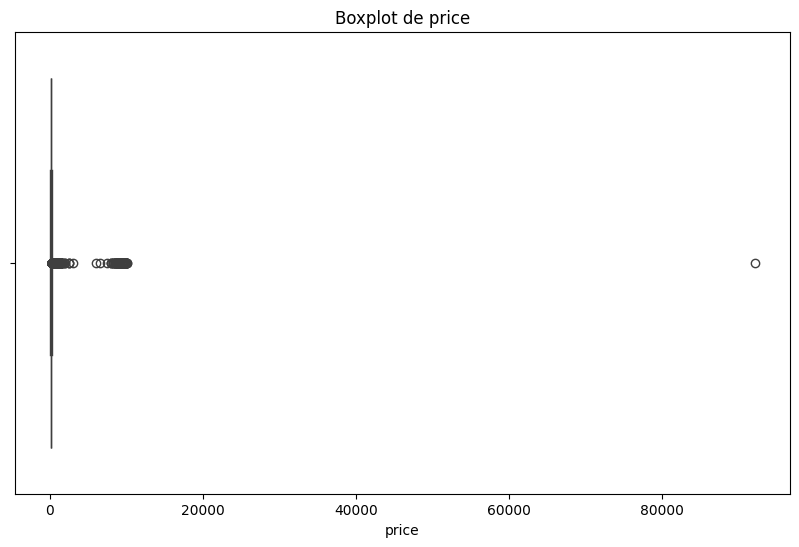

Outliers en 'minimum_nights': 472
    minimum_nights
26               7
38               7
42              30
60              15
63              60


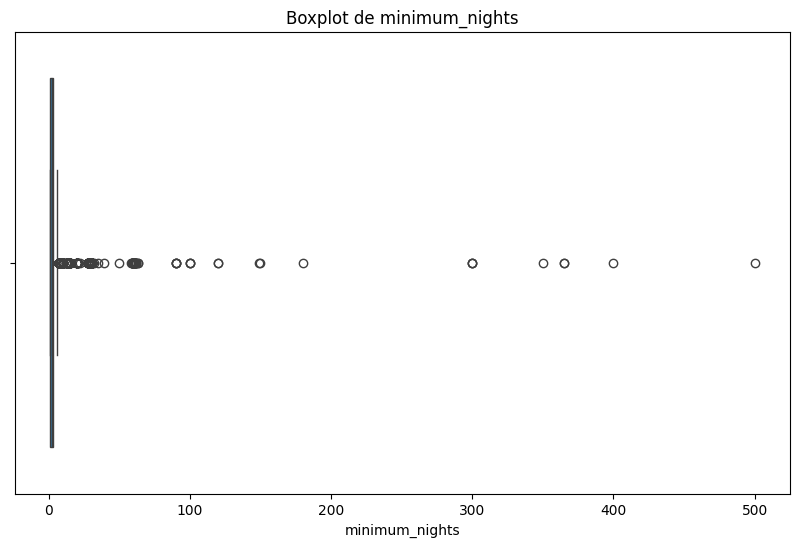

Outliers en 'maximum_nights': 0


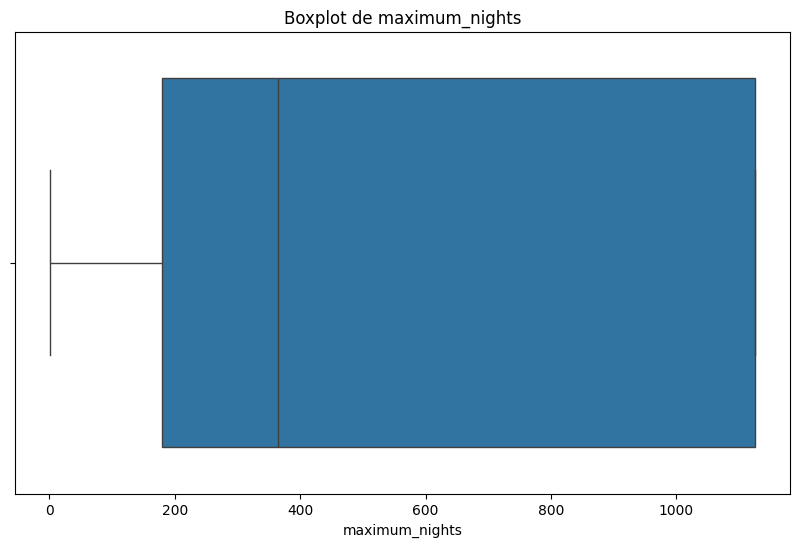

Outliers en 'accommodates': 231
     accommodates
33             11
116            11
127            10
186            15
210            16


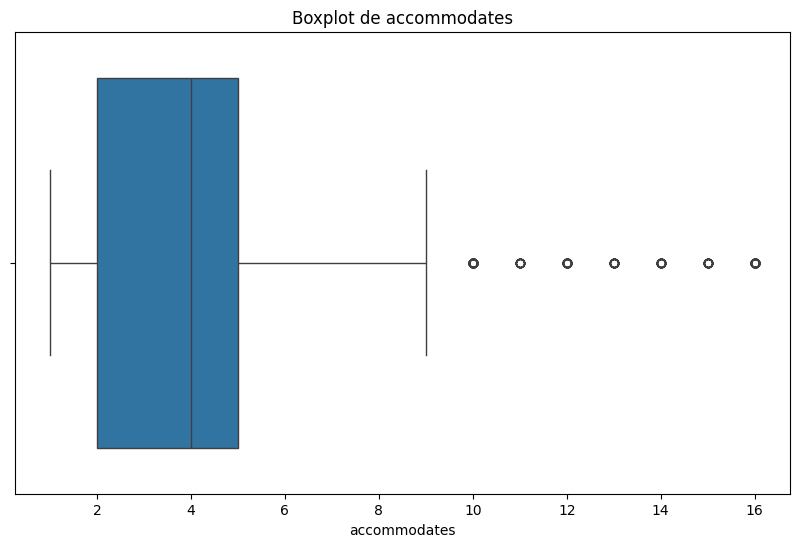

Outliers en 'beds': 268
     beds
24      7
33      8
41      7
116     9
186    18


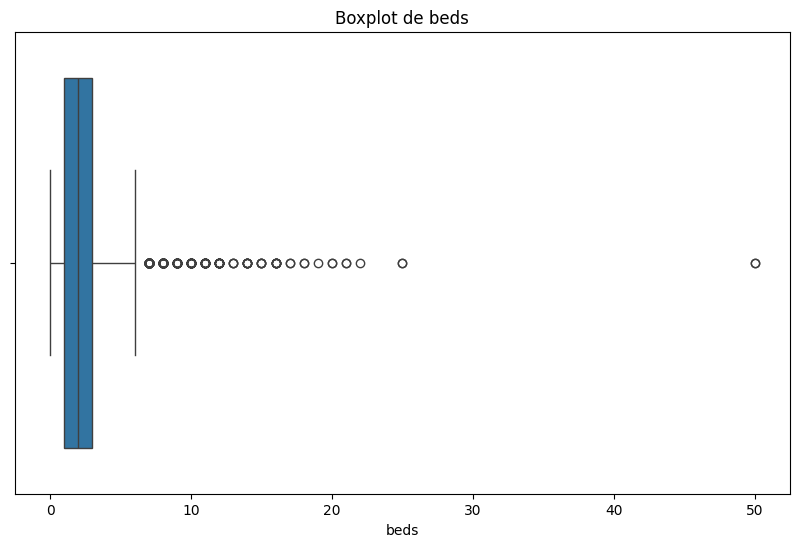

Outliers en 'bedrooms': 489
     bedrooms
24          4
33          4
109         4
116         5
127         4


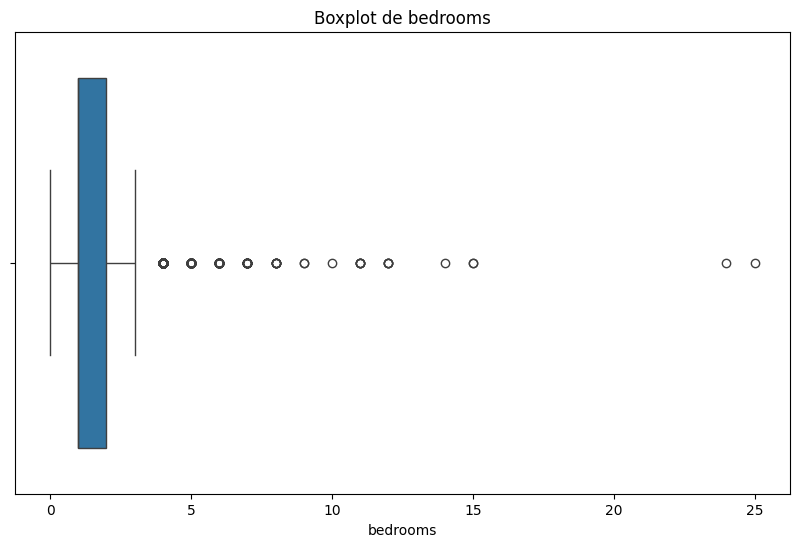

Outliers en 'number_of_reviews': 1572
   number_of_reviews
0                250
3                301
4                388
8                234
9                205


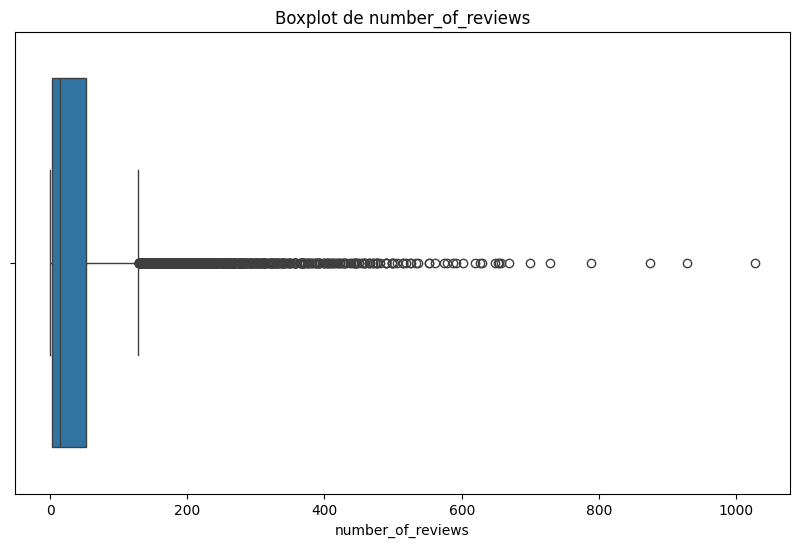

Outliers en 'reviews_per_month': 577
     reviews_per_month
84                5.86
85                6.52
107               5.08
222               4.54
230               4.19


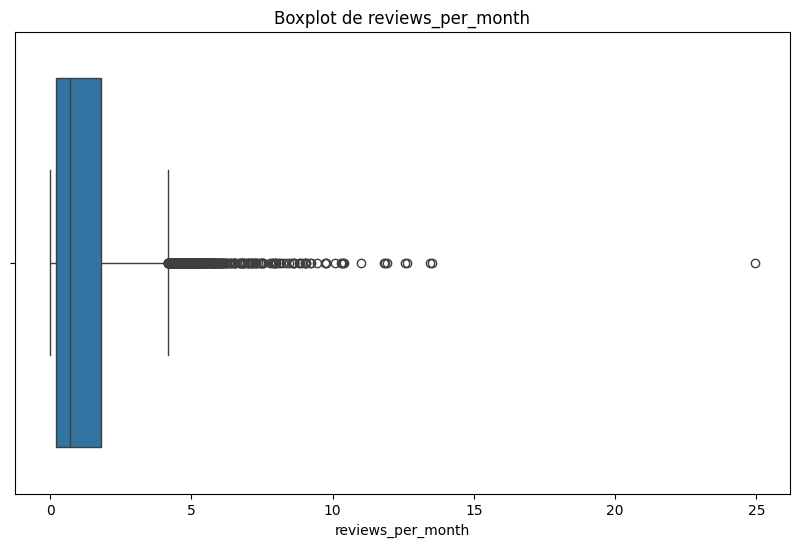

Outliers en 'estimated_revenue_l365d': 925
    estimated_revenue_l365d
24                 37632.00
48                 34650.00
52                 27820.00
63                 48419.76
90                 57375.00


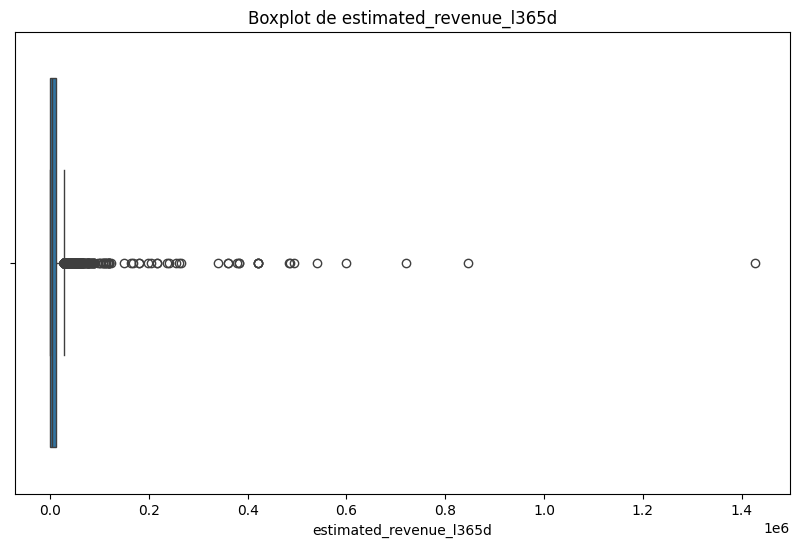

In [17]:
# Columnas a analizar
columns_to_check = ['price', 'minimum_nights', 'maximum_nights', 'accommodates', 
                    'beds', 'bedrooms', 'number_of_reviews', 'reviews_per_month', 
                    'estimated_revenue_l365d']

# Detectar y manejar outliers
for col in columns_to_check:
    if col in df.columns:
        # Detectar outliers combinando IQR y Modified Z-Score
        outliers = detect_outliers_combined(df, col)
        print(f"Outliers en '{col}': {len(outliers)}")
        
        # Mostrar algunos ejemplos de outliers
        if len(outliers) > 0:
            print(outliers[[col]].head())
        
        # Visualizar los outliers con un boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.xlabel(col)
        plt.show()

        # Opcional: Manejo de outliers
        # Eliminar outliers
        # df = df[~df.index.isin(outliers.index)]
        
        # Reemplazar outliers con el percentil 95
        # cap = df[col].quantile(0.95)
        # df.loc[df[col] > cap, col] = cap

## Creación de Nuevas Características

Crear nuevas columnas para enriquecer el dataset y facilitar el análisis.

In [14]:
# Calcular 'price_per_person'
df['price_per_person'] = df.apply(
    lambda row: row['price'] / row['accommodates'] if row['accommodates'] > 0 else 0, axis=1
)

# Calcular 'estimated_revenue_l365d' para valores nulos
df['estimated_revenue_l365d'] = df['estimated_revenue_l365d'].fillna(
    df['price'] * df['estimated_occupancy_l365d']
)

In [15]:
# Suma de nulos en el DataFrame
null_counts = df.isnull().sum()

# Mostrar los conteos de nulos
print("Conteos de nulos en el dataset actual:")
print(null_counts[null_counts > 0])

# Imprimir tamaño del DataFrame
print(df.shape)

Conteos de nulos en el dataset actual:
first_review    1167
last_review     1167
dtype: int64
(9621, 79)
